# Plots for the AN

In [9]:
import ROOT
import math
import numpy as np
import uproot
from IPython.display import Image, display, clear_output

responsefname = 'response_LEP1MC1994_v14.root'

## Response matrices

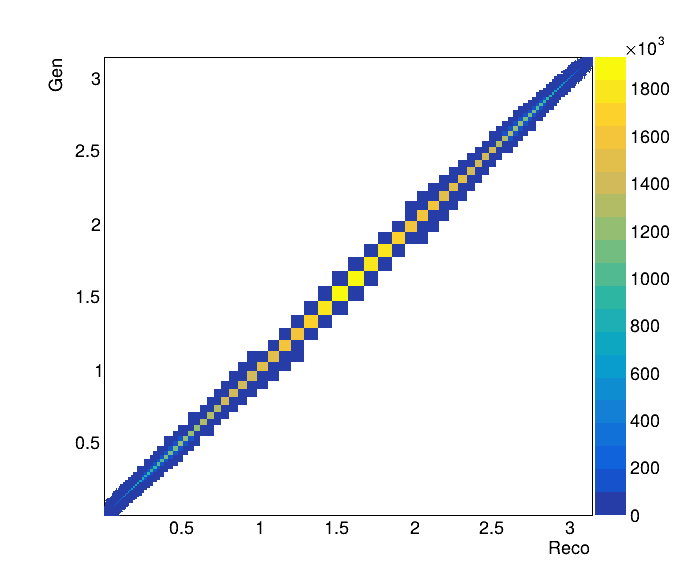

Warning in <TCanvas::Constructor>: Deleting canvas with same name: EEC
Info in <TCanvas::Print>: png file response_theta.png has been created


In [12]:
import ROOT

infile = ROOT.TFile(responsefname)

response_theta = infile.Get('resp_r')

c0 = ROOT.TCanvas("EEC", "", 0, 0, 700, 600)

c0.SetLeftMargin(0.15)
c0.SetRightMargin(0.15)
c0.SetTopMargin(0.1)
c0.SetBottomMargin(0.1)


response_theta.Draw('colz')
response_theta.SetTitle('')
response_theta.GetYaxis().SetTitle('Gen')
response_theta.GetXaxis().SetTitle('Reco')

c0.Update()

# Get the stat box
stat_box = response_theta.FindObject("stats")

# Customize the location of the stat box
if stat_box:
    stat_box.SetX1NDC(0.15)  # Left edge
    stat_box.SetY1NDC(0.7)  # Bottom edge
    stat_box.SetX2NDC(0.45)  # Right edge
    stat_box.SetY2NDC(0.9)  # Top edge
    stat_box.SetTextColor(ROOT.kRed)  # Optional: change text color

# Update the canvas to apply changes

c0.SaveAs('response_theta.png')
c0.Close()
#clear_output(wait=True)
display(Image("response_theta.png"))

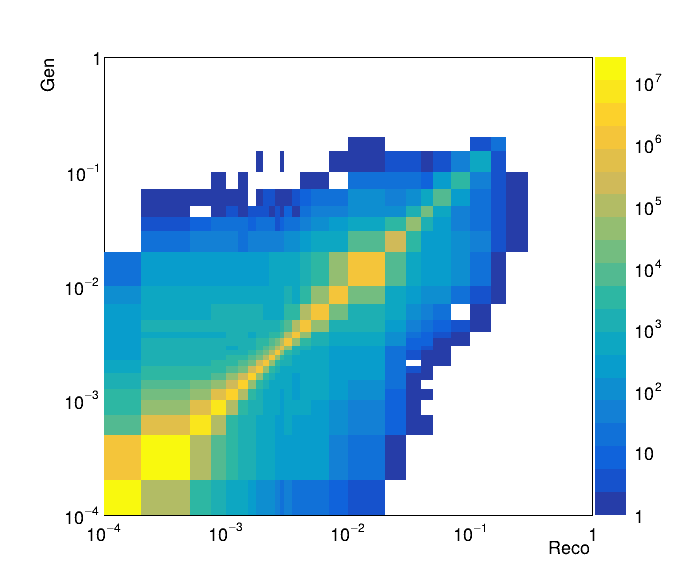

Warning in <TCanvas::Constructor>: Deleting canvas with same name: EEC
Info in <TCanvas::Print>: png file response_eij.png has been created


In [15]:
infile = ROOT.TFile(responsefname)

response_theta = infile.Get('resp_eij_bin2')

c1 = ROOT.TCanvas("EEC", "", 0, 0, 700, 600)

c1.SetLeftMargin(0.15)
c1.SetRightMargin(0.15)
c1.SetTopMargin(0.1)
c1.SetBottomMargin(0.1)

c1.SetLogx()
c1.SetLogy()
c1.SetLogz()

response_theta.Draw('colz')
response_theta.SetTitle('')
response_theta.GetYaxis().SetTitle('Gen')
response_theta.GetXaxis().SetTitle('Reco')

c1.Update()

# Get the stat box
stat_box = response_theta.FindObject("stats")

# Customize the location of the stat box
if stat_box:
    stat_box.SetX1NDC(0.15)  # Left edge
    stat_box.SetY1NDC(0.7)  # Bottom edge
    stat_box.SetX2NDC(0.45)  # Right edge
    stat_box.SetY2NDC(0.9)  # Top edge
    stat_box.SetTextColor(ROOT.kRed)  # Optional: change text color

# Update the canvas to apply changes
c1.SaveAs('response_eij.png')
c1.Close()
#clear_output(wait=True)
display(Image("response_eij.png"))

## Fakes and misses

In [5]:
xlow = np.log10(0.002)
xhigh = np.log10(np.pi/2)
nbins = 100

width = (xhigh-xlow)/nbins

bins=[]
for i in range(nbins+1):
    val = pow(10, xlow + i * width)
    bins += [val]

newbins = [np.pi- b for b in bins]
newbins = newbins[::-1]
del newbins[0]

bin_edge = bins+newbins

def devideBinWidth(h):
    for b in range(h.GetNbinsX()):
        h.SetBinContent(b+1, h.GetBinContent(b+1)/h.GetBinWidth(b+1))
        h.SetBinError(b+1, h.GetBinError(b+1)/h.GetBinWidth(b+1))
    return h

def Proj2D_X(h,ymin,ymax,hname="XXX",Debug=False):

    # project 2D histogram into 1D along Y

    imin=h.GetYaxis().FindBin(ymin)
    imax=h.GetYaxis().FindBin(ymax)-1

    print(imin, imax-1)

    proj_x=h.ProjectionX(hname, imin, imax)
    ROOT.SetOwnership(proj_x, True)

    return proj_x

xmin = 0.
xmax = 200.

ymin = 0.0001
ymax = 0.1

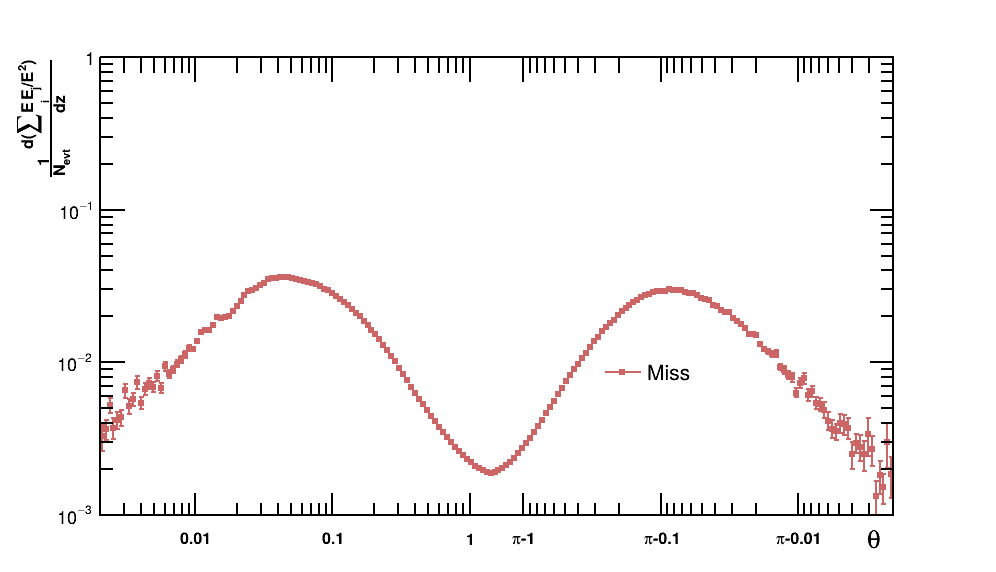

Warning in <TCanvas::Constructor>: Deleting canvas with same name: tmp
Info in <TCanvas::Print>: png file EEC_miss.png has been created


In [16]:
fdata = ROOT.TFile.Open(responsefname, 'r')
hdata = fdata.Get('miss_r')
hdata = devideBinWidth(hdata)
norm = fdata.Get('counter').GetBinContent(1)
hdata.Scale(1./norm)
data_eec = ROOT.TGraphErrors()
bins = []
for b in range(hdata.GetNbinsX()):
    data_eec.SetPoint(b, b+0.5, hdata.GetBinContent(b+1))
    data_eec.SetPointError(b, 0, hdata.GetBinError(b+1))
    bins += [hdata.GetBinLowEdge(b+1)]

ROOT.gStyle.SetOptStat(0)
c2 = ROOT.TCanvas("tmp", "", 0, 0, 1000, 600)
c2.cd()
c2.SetLogy()

ROOT.gPad.SetFrameLineColor(0)

data_eec.Draw('ap')
data_eec.GetXaxis().SetTickLength(0)
data_eec.GetXaxis().SetLabelSize(0)
data_eec.GetXaxis().SetRangeUser(0, 200)
data_eec.GetYaxis().SetRangeUser(ymin, ymax)
data_eec.GetYaxis().SetNdivisions(505)
data_eec.SetMarkerStyle(21)
data_eec.SetMarkerSize(0.75)
data_eec.SetMarkerColor(ROOT.kRed-6)
data_eec.SetLineWidth(2)
data_eec.SetLineColor(ROOT.kRed-6)

bins = np.array(bins)
labels=np.array([0.01, 0.1, 1, np.pi-1, np.pi-0.1, np.pi-0.01])
t_labels=['0.01', '0.1', '1', '#pi-1', '#pi-0.1', '#pi-0.01']

lower_indices = np.searchsorted(bins, labels, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (labels - x0) / (x1 - x0)
indices = lower_indices + fractional_part  # Final fractional indices

ticks = []
for i,l in enumerate(t_labels):
    latex = ROOT.TLatex()
    latex.SetTextSize(0.03)  # Text size (fraction of the pad height)
    latex.SetTextAlign(22) 
    latex.DrawLatex(indices[i], ymin - 0.3*ymin, l)
    tick = ROOT.TLine(indices[i], ymin, indices[i], ymin+ymin*0.2)
    tick.SetLineWidth(1)
    tick.Draw()
    ticks+=[tick]

l0 = ROOT.TLine(xmin,ymax,xmax,ymax)
l0.SetLineWidth(2)
l0.Draw()

l1 = ROOT.TLine(xmin,ymin,xmax,ymin)
l1.SetLineWidth(2)
l1.Draw()

increments = [0.001, 0.01, 0.1]
points_to_extrapolate = [
    increment + increment * i
    for increment in increments
    for i in range(10)
]

points_to_extrapolate=[]
for i in range(9):
    points_to_extrapolate+=[0.002+0.001*i]
for i in range(10):
    points_to_extrapolate+=[0.01+0.01*i]
for i in range(10):
    points_to_extrapolate+=[0.1+0.1*i]

lower_indices = np.searchsorted(bins, points_to_extrapolate, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (points_to_extrapolate - x0) / (x1 - x0)
p_indices = lower_indices + fractional_part  # Final fractional indices

f = ROOT.TF1("f","log10(x)",ymin,ymax)
newaxis0 = ROOT.TGaxis(p_indices[0],ymin,p_indices[0],ymax,'f',505,"-G")
newaxis0.SetLabelSize(0)
newaxis0.SetLineWidth(2)
newaxis0.Draw()

newaxis1 = ROOT.TGaxis(xmax-p_indices[0],ymin,xmax-p_indices[0],ymax,'f',505,"+G")
newaxis1.SetLabelSize(0)
newaxis1.SetLineWidth(2)
newaxis1.Draw()

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], 0.7*ymax, indices[i], ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], ymin, indices[i], ymin+ymin*0.4)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, 0.8*ymax, xmin+point, ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, 0.8*ymax, xmax-point, ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, ymin, xmin+point, ymin+ymin*0.2)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, ymin, xmax-point, ymin+ymin*0.2)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

legend = ROOT.TLegend(0.6, 0.2, 0.8, 0.5)
legend.AddEntry(data_eec, "Miss", 'alp')
legend.SetTextSize(0.04)
legend.SetFillStyle(0)
legend.SetLineWidth(0)
legend.Draw("same")

txt0 = ROOT.TLatex()
txt0.SetTextSize(0.05) 
txt0.SetTextAlign(22) 
txt0.DrawLatex(195, ymin - 0.3*ymin, "#theta")

txt1 = ROOT.TLatex()
txt1.SetTextSize(0.03) 
txt1.SetTextAlign(22) 
txt1.SetTextAngle(90)
txt1.DrawLatex(-14, 0.4*ymax, "#frac{1}{N_{evt}}#frac{d(#sumE_{i}E_{j}/E^{2})}{dz}")

c2.SaveAs('EEC_miss.png')
c2.Close()
#clear_output(wait=True)
display(Image("EEC_miss.png"))

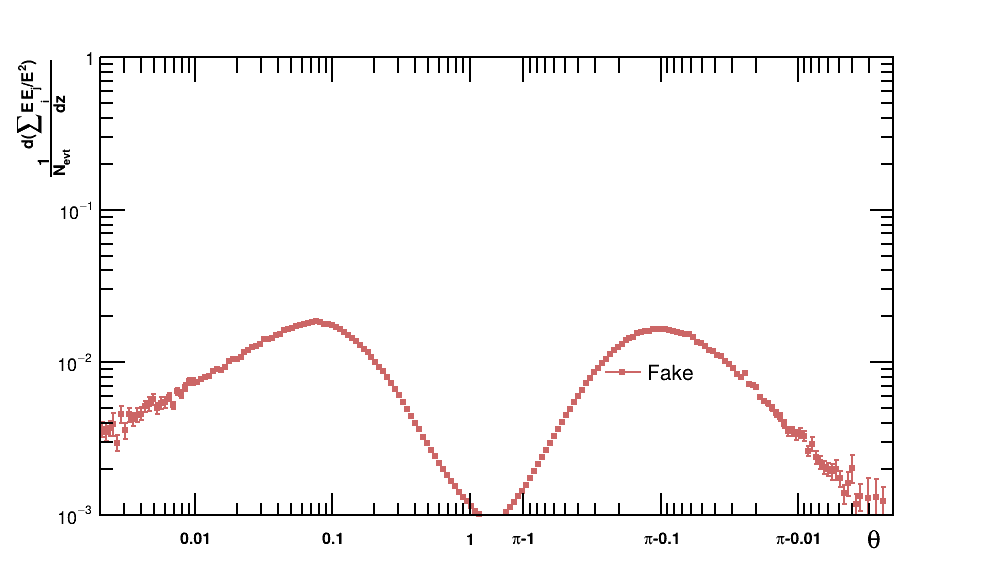

Info in <TCanvas::Print>: png file EEC_fake.png has been created


In [17]:
fdata = ROOT.TFile.Open(responsefname, 'r')
hdata = fdata.Get('fake_r')
hdata = devideBinWidth(hdata)
norm = fdata.Get('counter').GetBinContent(1)
hdata.Scale(1./norm)
data_eec = ROOT.TGraphErrors()
bins = []
for b in range(hdata.GetNbinsX()):
    data_eec.SetPoint(b, b+0.5, hdata.GetBinContent(b+1))
    data_eec.SetPointError(b, 0, hdata.GetBinError(b+1))
    bins += [hdata.GetBinLowEdge(b+1)]

ROOT.gStyle.SetOptStat(0)
c2 = ROOT.TCanvas("tmp", "", 0, 0, 1000, 600)
c2.cd()
c2.SetLogy()

ROOT.gPad.SetFrameLineColor(0)

data_eec.Draw('ap')
data_eec.GetXaxis().SetTickLength(0)
data_eec.GetXaxis().SetLabelSize(0)
data_eec.GetXaxis().SetRangeUser(0, 200)
data_eec.GetYaxis().SetRangeUser(ymin, ymax)
data_eec.GetYaxis().SetNdivisions(505)
data_eec.SetMarkerStyle(21)
data_eec.SetMarkerSize(0.75)
data_eec.SetMarkerColor(ROOT.kRed-6)
data_eec.SetLineWidth(2)
data_eec.SetLineColor(ROOT.kRed-6)

bins = np.array(bins)
labels=np.array([0.01, 0.1, 1, np.pi-1, np.pi-0.1, np.pi-0.01])
t_labels=['0.01', '0.1', '1', '#pi-1', '#pi-0.1', '#pi-0.01']

lower_indices = np.searchsorted(bins, labels, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (labels - x0) / (x1 - x0)
indices = lower_indices + fractional_part  # Final fractional indices

ticks = []
for i,l in enumerate(t_labels):
    latex = ROOT.TLatex()
    latex.SetTextSize(0.03)  # Text size (fraction of the pad height)
    latex.SetTextAlign(22) 
    latex.DrawLatex(indices[i], ymin - 0.3*ymin, l)
    tick = ROOT.TLine(indices[i], ymin, indices[i], ymin+ymin*0.2)
    tick.SetLineWidth(1)
    tick.Draw()
    ticks+=[tick]

l0 = ROOT.TLine(xmin,ymax,xmax,ymax)
l0.SetLineWidth(2)
l0.Draw()

l1 = ROOT.TLine(xmin,ymin,xmax,ymin)
l1.SetLineWidth(2)
l1.Draw()

increments = [0.001, 0.01, 0.1]
points_to_extrapolate = [
    increment + increment * i
    for increment in increments
    for i in range(10)
]

points_to_extrapolate=[]
for i in range(9):
    points_to_extrapolate+=[0.002+0.001*i]
for i in range(10):
    points_to_extrapolate+=[0.01+0.01*i]
for i in range(10):
    points_to_extrapolate+=[0.1+0.1*i]

lower_indices = np.searchsorted(bins, points_to_extrapolate, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (points_to_extrapolate - x0) / (x1 - x0)
p_indices = lower_indices + fractional_part  # Final fractional indices

f = ROOT.TF1("f","log10(x)",ymin,ymax)
newaxis0 = ROOT.TGaxis(p_indices[0],ymin,p_indices[0],ymax,'f',505,"-G")
newaxis0.SetLabelSize(0)
newaxis0.SetLineWidth(2)
newaxis0.Draw()

newaxis1 = ROOT.TGaxis(xmax-p_indices[0],ymin,xmax-p_indices[0],ymax,'f',505,"+G")
newaxis1.SetLabelSize(0)
newaxis1.SetLineWidth(2)
newaxis1.Draw()

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], 0.7*ymax, indices[i], ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], ymin, indices[i], ymin+ymin*0.4)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, 0.8*ymax, xmin+point, ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, 0.8*ymax, xmax-point, ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, ymin, xmin+point, ymin+ymin*0.2)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, ymin, xmax-point, ymin+ymin*0.2)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

legend = ROOT.TLegend(0.6, 0.2, 0.8, 0.5)
legend.AddEntry(data_eec, "Fake", 'alp')
legend.SetTextSize(0.04)
legend.SetFillStyle(0)
legend.SetLineWidth(0)
legend.Draw("same")

txt0 = ROOT.TLatex()
txt0.SetTextSize(0.05) 
txt0.SetTextAlign(22) 
txt0.DrawLatex(195, ymin - 0.3*ymin, "#theta")

txt1 = ROOT.TLatex()
txt1.SetTextSize(0.03) 
txt1.SetTextAlign(22) 
txt1.SetTextAngle(90)
txt1.DrawLatex(-14, 0.4*ymax, "#frac{1}{N_{evt}}#frac{d(#sumE_{i}E_{j}/E^{2})}{dz}")

c2.SaveAs('EEC_fake.png')
c2.Close()
#clear_output(wait=True)
display(Image("EEC_fake.png"))

## Closure

In [18]:
eijbins2 = [0.0, 0.0001, 0.0002, 0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002, 0.00225, 0.0025, 0.00275, 0.003, 0.0035, 0.004, 0.005, 0.007, 0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.10, 0.15, 0.20, 0.3, 1]
unfoldfname1 = 'unfolded_v5_bin2.root'
unfoldfname2 = 'unfolded_v5_bin2.root'

bins = np.array(bins)

labels=np.array([0.01, 0.1, 1, np.pi-1, np.pi-0.1, np.pi-0.01])
t_labels=['0.01', '0.1', '1', '#pi-1', '#pi-0.1', '#pi-0.01']

lower_indices = np.searchsorted(bins, labels, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (labels - x0) / (x1 - x0)
indices = lower_indices + fractional_part  # Final fractional indices

increments = [0.001, 0.01, 0.1]
points_to_extrapolate = [
    increment + increment * i
    for increment in increments
    for i in range(10)
]

points_to_extrapolate=[]
for i in range(9):
    points_to_extrapolate+=[0.002+0.001*i]
for i in range(10):
    points_to_extrapolate+=[0.01+0.01*i]
for i in range(10):
    points_to_extrapolate+=[0.1+0.1*i]

lower_indices = np.searchsorted(bins, points_to_extrapolate, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (points_to_extrapolate - x0) / (x1 - x0)
p_indices = lower_indices + fractional_part  # Final fractional indices

## Results

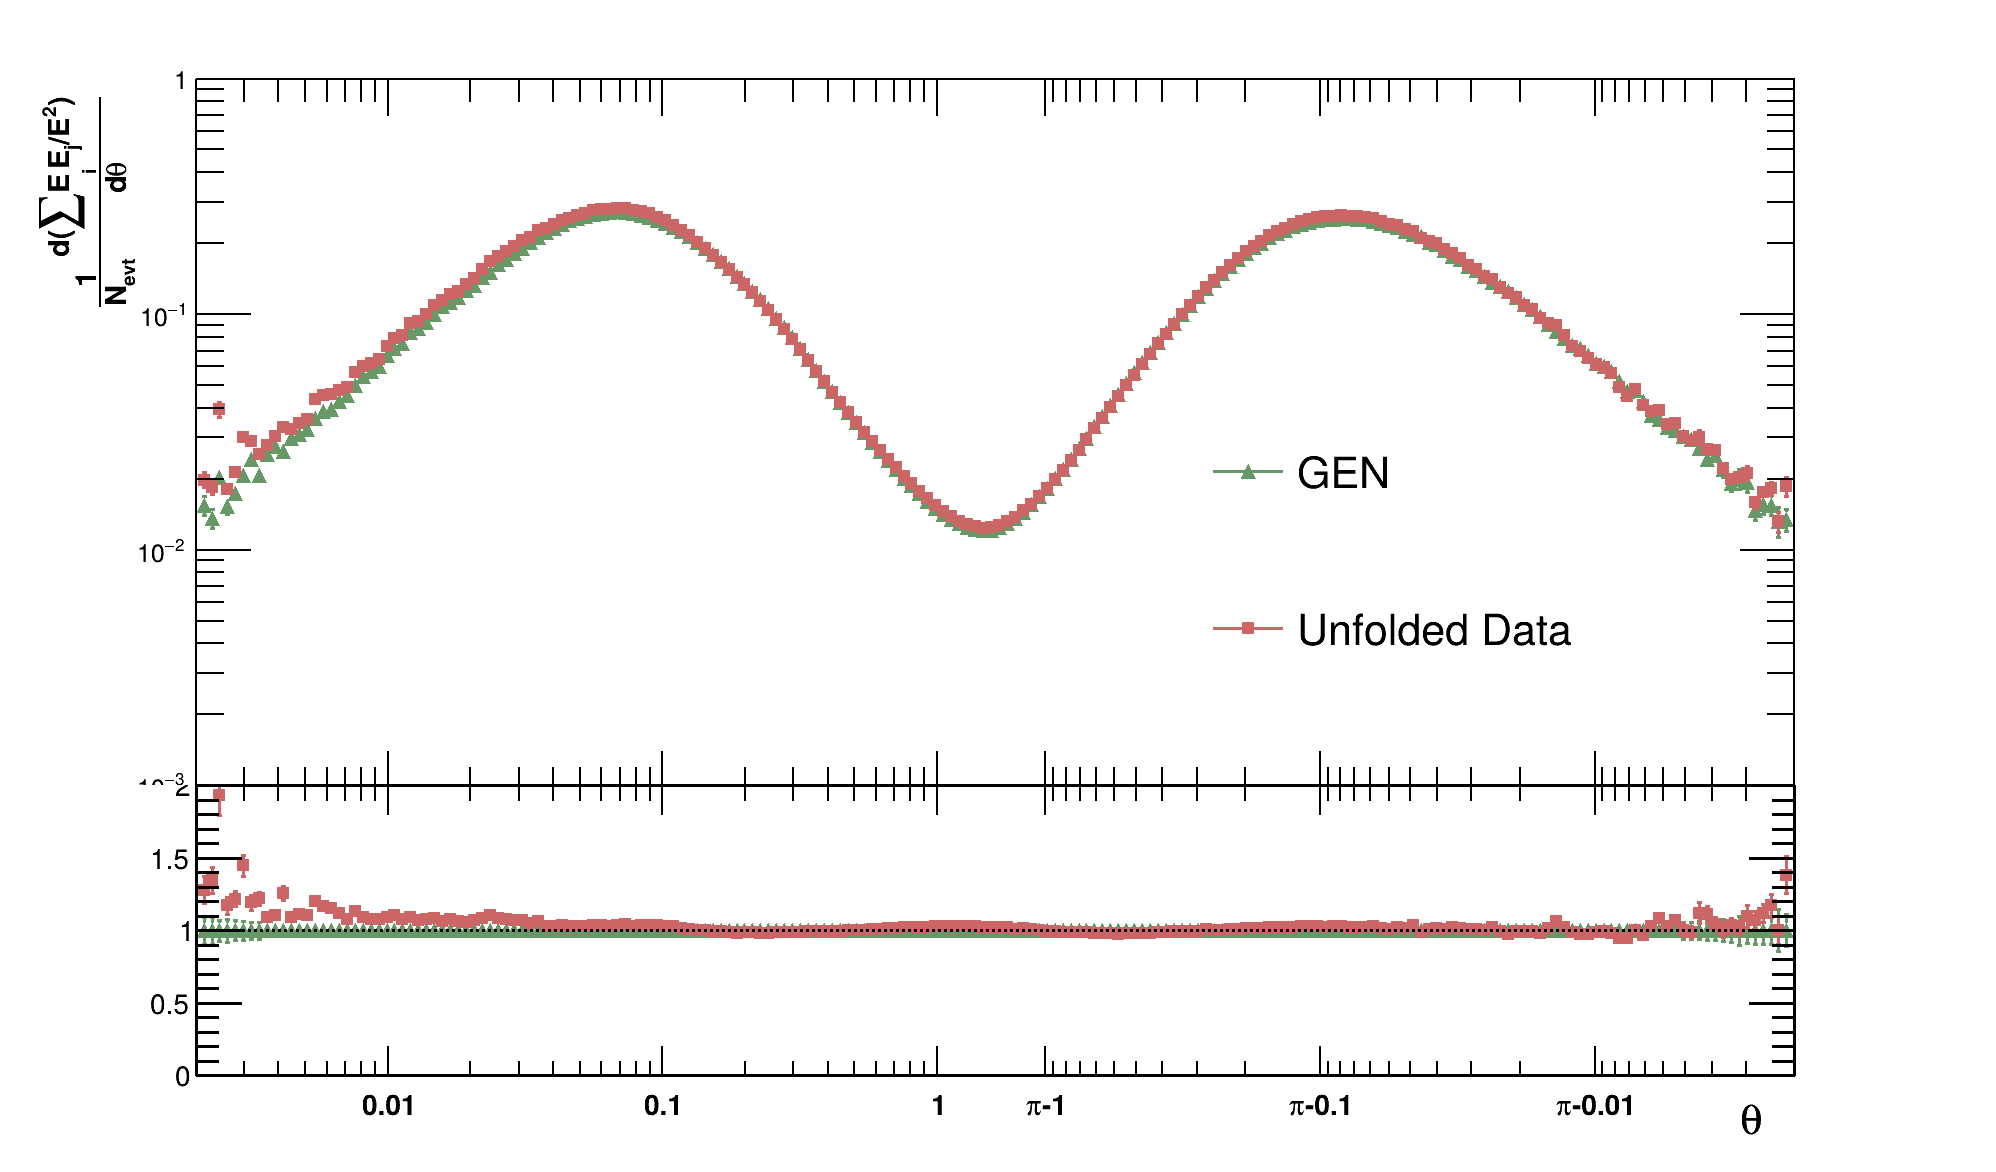

Info in <TCanvas::Print>: png file EEC_unfold_data_theta.png has been created


In [21]:
eijbins2 = [0.0, 0.0001, 0.0002, 0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002, 0.00225, 0.0025, 0.00275, 0.003, 0.0035, 0.004, 0.005, 0.007, 0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.10, 0.15, 0.20, 0.3, 1]
unfoldfname1 = 'unfolded_data_v14_bin2.root'
unfoldfname2 = 'unfolded_data_v14_bin2.root'

infile1 = ROOT.TFile(unfoldfname1)
infile2 = ROOT.TFile(unfoldfname2)
responsefile = ROOT.TFile(responsefname)
normalization = responsefile.Get('counter').GetBinContent(2)

hdata1 = infile1.Get('GEN_Eij_Bin0')
hdata1.Scale(0.)
hdata1.SetDirectory(0)
unfold1 = []
for i in range(len(eijbins2)-1):
    unfold1d = infile1.Get(f'GEN_Eij_Bin{i}')
    unfold1d.SetDirectory(0)
    unfold1+=[unfold1d]
    unfold1d.Scale((eijbins2[i]+eijbins2[i+1])/2.)
    hdata1.Add(unfold1d)
hdata1=devideBinWidth(hdata1)
hdata1.Scale(1./normalization)

hdata2 = infile2.Get('UNFOLD_Eij_Bin0')
hdata2.Scale(0.)
hdata2.SetDirectory(0)
unfold2 = []
for i in range(len(eijbins2)-1):
    unfold1d = infile2.Get(f'UNFOLD_Eij_Bin{i}')
    unfold1d.SetDirectory(0)
    unfold2+=[unfold1d]
    unfold1d.Scale((eijbins2[i]+eijbins2[i+1])/2.)
    hdata2.Add(unfold1d)
hdata2=devideBinWidth(hdata2)
hdata2.Scale(1./normalization)

data1_eec = ROOT.TGraphErrors()
data2_eec = ROOT.TGraphErrors()
#mc_eec = ROOT.TGraphErrors()
ratio1 = ROOT.TGraphErrors()
ratio2 = ROOT.TGraphErrors()

bins = []
eecs = []
errs = []
for b in range(hdata1.GetNbinsX()):
    data1_eec.SetPoint(b, b+0.5, hdata1.GetBinContent(b+1))
    data1_eec.SetPointError(b, 0, hdata1.GetBinError(b+1))
    data2_eec.SetPoint(b, b+0.5, hdata2.GetBinContent(b+1))
    data2_eec.SetPointError(b, 0, hdata2.GetBinError(b+1))
    #mc_eec.SetPoint(b, b+0.5, hmc.GetBinContent(b+1))
    #mc_eec.SetPointError(b, 0, hmc.GetBinError(b+1))
    #den = hmc.GetBinContent(b+1) 
    den = hdata1.GetBinContent(b+1)
    bins+=[hdata1.GetBinCenter(b+1)]
    eecs+=[hdata2.GetBinContent(b+1)]
    errs+=[hdata2.GetBinError(b+1)]
    ratio1.SetPoint(b, b+0.5, hdata1.GetBinContent(b+1)/den)
    ratio1.SetPointError(b, 0, hdata1.GetBinError(b+1)/den)
    ratio2.SetPoint(b, b+0.5, hdata2.GetBinContent(b+1)/den)
    ratio2.SetPointError(b, 0, hdata2.GetBinError(b+1)/den)

labels=np.array([0.01, 0.1, 1, np.pi-1, np.pi-0.1, np.pi-0.01])
t_labels=['0.01', '0.1', '1', '#pi-1', '#pi-0.1', '#pi-0.01']

lower_indices = np.searchsorted(bins, labels, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

bins = np.array(bins)

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (labels - x0) / (x1 - x0)
indices = lower_indices + fractional_part  # Final fractional indices

increments = [0.001, 0.01, 0.1]
points_to_extrapolate = [
    increment + increment * i
    for increment in increments
    for i in range(10)
]

points_to_extrapolate=[]
for i in range(9):
    points_to_extrapolate+=[0.002+0.001*i]
for i in range(10):
    points_to_extrapolate+=[0.01+0.01*i]
for i in range(10):
    points_to_extrapolate+=[0.1+0.1*i]

lower_indices = np.searchsorted(bins, points_to_extrapolate, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (points_to_extrapolate - x0) / (x1 - x0)
p_indices = lower_indices + fractional_part  # Final fractional indices

#hdata2.Scale(423832+437325+472380/normalization)

#hmc = responsefile.Get('gen1d_eec')

ROOT.gStyle.SetLineWidth(0)

xmin = 0.
xmax = 200.

ymin = 0.001
ymax = 1

rymin = 0.
rymax = 2
rylen = rymax-rymin

ticks = []

ROOT.gStyle.SetOptStat(0)
c4 = ROOT.TCanvas("tmp", "", 0, 0, 2000, 1200)

c4.Divide(1, 2)
pad1 = ROOT.TPad("", "", 0, 0.33, 1, 1)
pad2 = ROOT.TPad("", "", 0, 0, 1, 0.33)
pad1.SetFrameLineWidth(0)
pad2.SetFrameLineWidth(0)

pad1.SetBottomMargin(0.0)
pad2.SetTopMargin(0.0)
pad2.SetBottomMargin(0.25) 

pad1.Draw()
pad2.Draw()

pad1.cd()
pad1.SetLogy()
data1_eec.Draw('ap')
data1_eec.SetMarkerSize(2)
data1_eec.SetMarkerStyle(22)
data1_eec.SetMarkerColor(ROOT.kGreen-5)
data1_eec.SetLineColor(ROOT.kGreen-5)
data1_eec.SetLineWidth(3)
data1_eec.GetXaxis().SetTickLength(0)
data1_eec.GetXaxis().SetLabelSize(0)
data1_eec.GetXaxis().SetRangeUser(xmin, xmax)
data1_eec.GetYaxis().SetRangeUser(ymin, ymax)

data2_eec.Draw('samep')
data2_eec.SetMarkerSize(1.5)
data2_eec.SetMarkerStyle(21)
data2_eec.SetMarkerColor(ROOT.kRed-6)
data2_eec.SetLineColor(ROOT.kRed-6)
data2_eec.SetLineWidth(3)

#mc_eec.Draw('samep')
#c_eec.SetMarkerSize(2)
#mc_eec.SetMarkerStyle(20)
#mc_eec.SetMarkerColor(ROOT.kGray+2)
#mc_eec.SetLineColor(ROOT.kGray+2)
#mc_eec.SetLineWidth(3)

data1_eec.Draw('samep')
data2_eec.Draw('samep')

f = ROOT.TF1("f", "log10(x)", ymin, ymax)
newaxis0 = ROOT.TGaxis(p_indices[0],ymin,p_indices[0],ymax,'f',505,"-G")
newaxis0.SetLabelSize(0)
newaxis0.SetLineWidth(2)
newaxis0.Draw()

newaxis1 = ROOT.TGaxis(xmax-p_indices[0],ymin,xmax-p_indices[0],ymax,'f',505,"+G")
newaxis1.SetLabelSize(0)
newaxis1.SetLineWidth(2)
newaxis1.Draw()

l0 = ROOT.TLine(xmin,ymax,xmax,ymax)
l0.SetLineWidth(2)
l0.Draw()

l1 = ROOT.TLine(xmin,ymin,xmax,ymin)
l1.SetLineWidth(2)
l1.Draw()

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], 0.7*ymax, indices[i], ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], ymin, indices[i], ymin+ymin*0.4)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, 0.8*ymax, xmin+point, ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, 0.8*ymax, xmax-point, ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, ymin, xmin+point, ymin+ymin*0.2)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, ymin, xmax-point, ymin+ymin*0.2)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

txt1 = ROOT.TLatex()
txt1.SetTextSize(0.04) 
txt1.SetTextAlign(22) 
txt1.SetTextAngle(90)
txt1.DrawLatex(-14, 0.3*ymax, "#frac{1}{N_{evt}}#frac{d(#sumE_{i}E_{j}/E^{2})}{d#theta}")

legend = ROOT.TLegend(0.6, 0.1, 0.8, 0.5)
legend.AddEntry(data1_eec, "GEN", 'alp')
legend.AddEntry(data2_eec, "Unfolded Data", 'alp')
#legend.AddEntry(mc_eec, "GEN 1d", 'alp')
legend.SetTextSize(0.06)
legend.SetFillStyle(0)
legend.Draw("same")

pad2.cd()
ratio1.Draw('ap')
ratio1.SetLineWidth(2)
ratio1.GetXaxis().SetTickLength(0)
ratio1.GetXaxis().SetLabelSize(0)
ratio1.GetXaxis().SetRangeUser(xmin, xmax)
ratio1.SetMarkerSize(2)
ratio1.SetMarkerStyle(22)
ratio1.SetMarkerColor(ROOT.kGreen-5)
ratio1.SetLineColor(ROOT.kGreen-5)
ratio1.SetLineWidth(3)

ratio1.GetYaxis().SetRangeUser(rymin, rymax)
ratio1.GetYaxis().SetNdivisions(505)
ratio1.GetYaxis().SetLabelSize(0.08)

ratio2.Draw('samep')
ratio2.SetMarkerSize(1.5)
ratio2.SetMarkerStyle(21)
ratio2.SetMarkerColor(ROOT.kRed-6)
ratio2.SetLineColor(ROOT.kRed-6)
ratio2.SetLineWidth(3)

for i,l in enumerate(t_labels):
    latex = ROOT.TLatex()
    latex.SetTextSize(0.08) 
    latex.SetTextAlign(22) 
    latex.DrawLatex(indices[i], rymin-0.1*rylen, l)
    tick = ROOT.TLine(indices[i], rymin, indices[i], rymin+rylen*0.1)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], rymax-rylen*0.1, indices[i], rymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, rymin, xmin+point, rymin+rylen*0.05)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, rymin, xmax-point, rymin+rylen*0.05)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, rymax-rylen*0.05, xmin+point, rymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmax-point, rymax-rylen*0.05, xmax-point, rymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

newaxis2 = ROOT.TGaxis(p_indices[0], rymin, p_indices[0], rymax, rymin, rymax, 505, '-L')
newaxis2.SetLabelSize(0)
newaxis2.SetLineWidth(3)
newaxis2.Draw()

newaxis3 = ROOT.TGaxis(xmax-p_indices[0], rymin, xmax-p_indices[0], rymax, rymin, rymax, 505, '+L')
newaxis3.SetLabelSize(0)
newaxis3.SetLineWidth(3)
newaxis3.Draw()

l2 = ROOT.TLine(0, rymax, 200, rymax)
l2.SetLineWidth(3)
l2.Draw()

l3 = ROOT.TLine(0, rymin, 200, rymin)
l3.SetLineWidth(3)
l3.Draw()

l4 = ROOT.TLine(0,1,200,1)
l4.SetLineWidth(3)
l4.SetLineStyle(2)
l4.Draw()

txt2 = ROOT.TLatex()
txt2.SetTextSize(0.12) 
txt2.SetTextAlign(22) 
txt2.DrawLatex(195, rymin-0.15*rylen, "#theta")

c4.SaveAs('EEC_unfold_data_theta.png')
c4.Close()
#clear_output(wait=True)
display(Image("EEC_unfold_data_theta.png"))

out = list(zip(bins, eecs, errs))

import json

with open("results_theta.json", "w") as file:
    json.dump(out, file, indent=2)

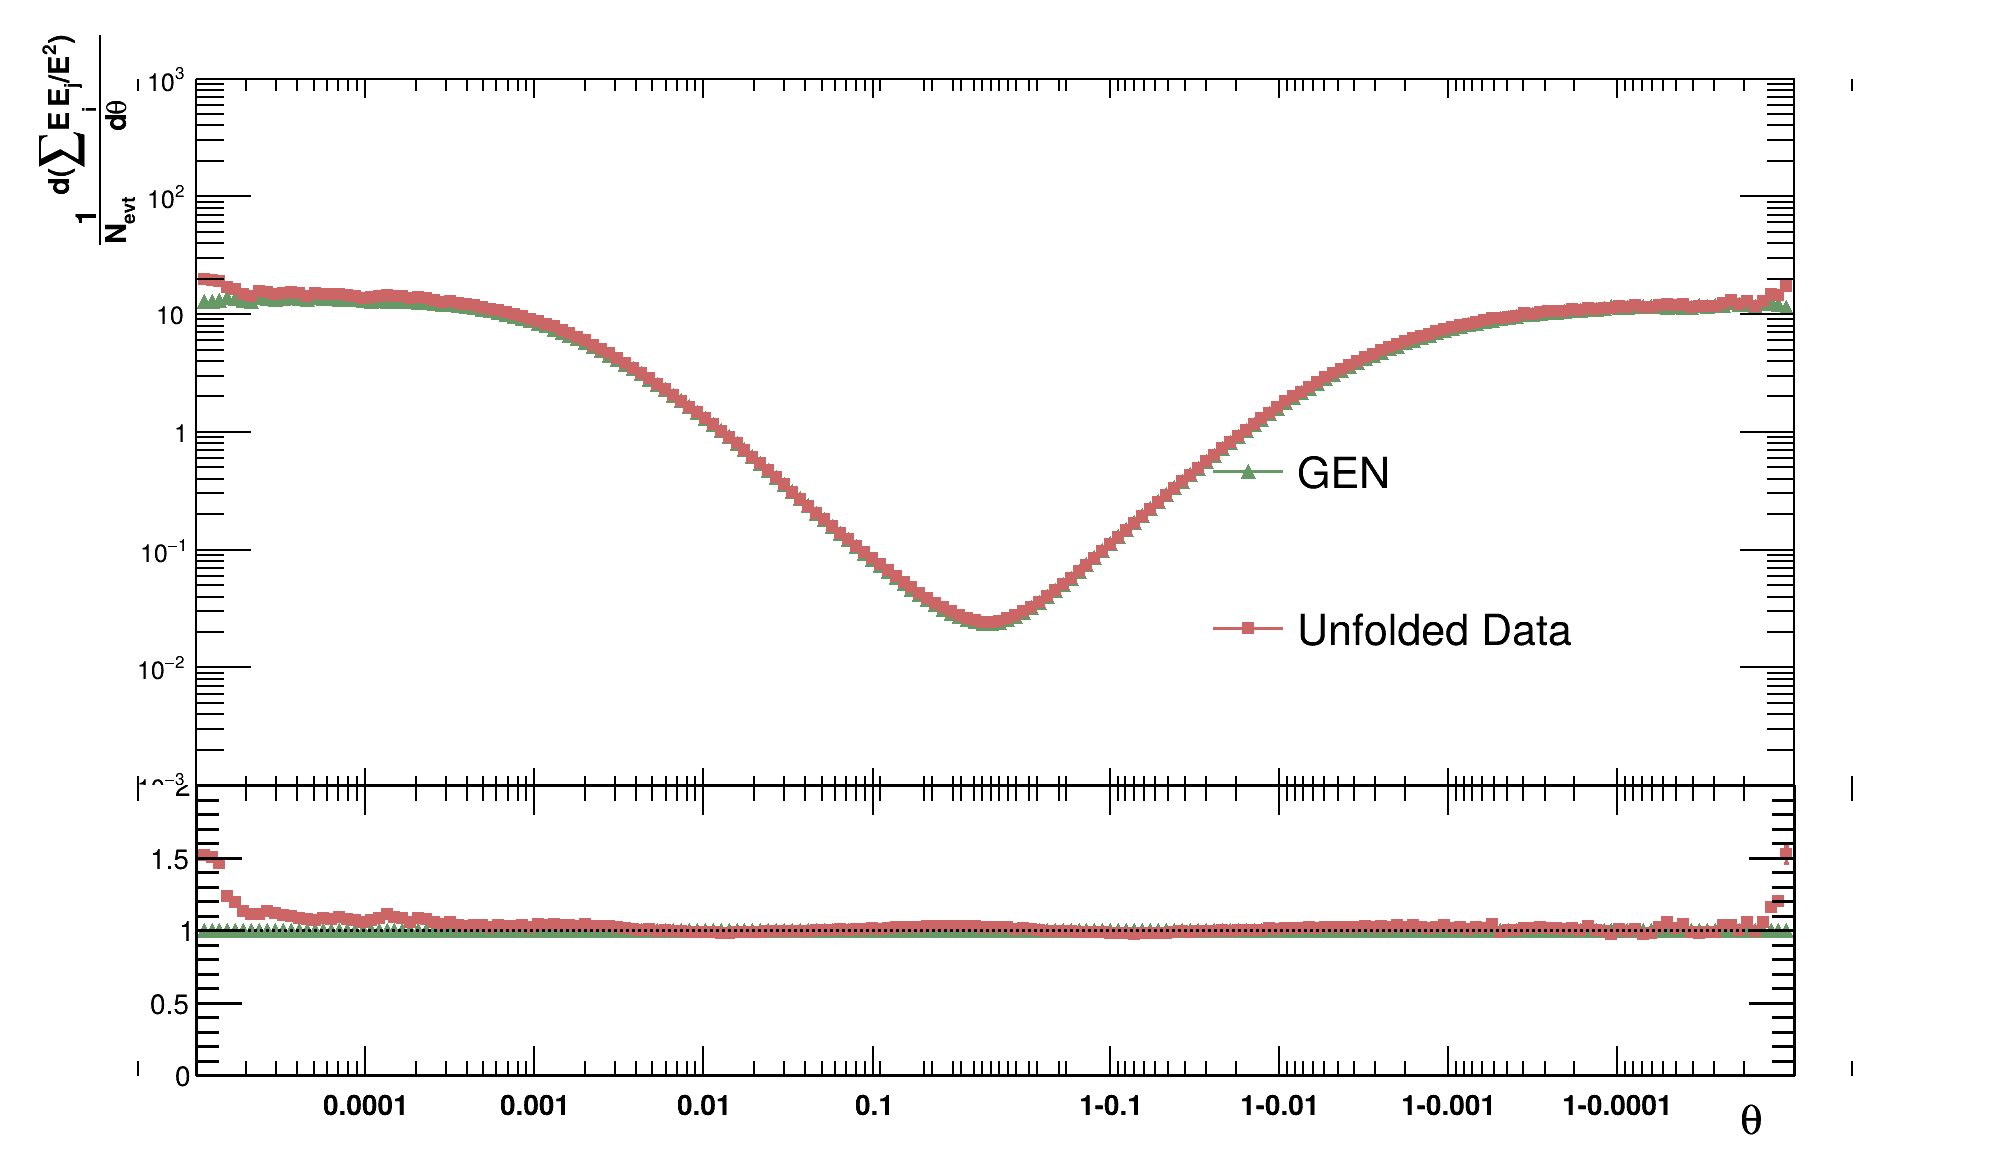

Info in <TCanvas::Print>: png file EEC_unfold_data_z.png has been created


In [22]:
eijbins2 = [0.0, 0.0001, 0.0002, 0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002, 0.00225, 0.0025, 0.00275, 0.003, 0.0035, 0.004, 0.005, 0.007, 0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.10, 0.15, 0.20, 0.3, 1]
unfoldfname1 = 'unfolded_data_z_v14_bin2.root'
unfoldfname2 = 'unfolded_data_z_v14_bin2.root'

infile1 = ROOT.TFile(unfoldfname1)
infile2 = ROOT.TFile(unfoldfname2)
responsefile = ROOT.TFile(responsefname)
normalization = responsefile.Get('counter').GetBinContent(1)

hdata1 = infile1.Get('GEN_Eij_Bin0')
hdata1.Scale(0.)
hdata1.SetDirectory(0)
unfold1 = []
for i in range(len(eijbins2)-1):
    unfold1d = infile1.Get(f'GEN_Eij_Bin{i}')
    unfold1d.SetDirectory(0)
    unfold1+=[unfold1d]
    unfold1d.Scale((eijbins2[i]+eijbins2[i+1])/2.)
    hdata1.Add(unfold1d)
hdata1=devideBinWidth(hdata1)
hdata1.Scale(1./normalization)

hdata2 = infile2.Get('UNFOLD_Eij_Bin0')
hdata2.Scale(0.)
hdata2.SetDirectory(0)
unfold2 = []
for i in range(len(eijbins2)-1):
    unfold1d = infile2.Get(f'UNFOLD_Eij_Bin{i}')
    unfold1d.SetDirectory(0)
    unfold2+=[unfold1d]
    unfold1d.Scale((eijbins2[i]+eijbins2[i+1])/2.)
    hdata2.Add(unfold1d)
hdata2=devideBinWidth(hdata2)
hdata2.Scale(1./normalization)

data1_eec = ROOT.TGraphErrors()
data2_eec = ROOT.TGraphErrors()
#mc_eec = ROOT.TGraphErrors()
ratio1 = ROOT.TGraphErrors()
ratio2 = ROOT.TGraphErrors()

bins = []
eecs = []
errs = []
for b in range(hdata1.GetNbinsX()):
    data1_eec.SetPoint(b, b+0.5, hdata1.GetBinContent(b+1))
    data1_eec.SetPointError(b, 0, hdata1.GetBinError(b+1))
    data2_eec.SetPoint(b, b+0.5, hdata2.GetBinContent(b+1))
    data2_eec.SetPointError(b, 0, hdata2.GetBinError(b+1))
    #mc_eec.SetPoint(b, b+0.5, hmc.GetBinContent(b+1))
    #mc_eec.SetPointError(b, 0, hmc.GetBinError(b+1))
    #den = hmc.GetBinContent(b+1) 
    den = hdata1.GetBinContent(b+1)
    bins+=[hdata1.GetBinCenter(b+1)]
    eecs+=[hdata2.GetBinContent(b+1)]
    errs+=[hdata2.GetBinError(b+1)]
    ratio1.SetPoint(b, b+0.5, hdata1.GetBinContent(b+1)/den)
    ratio1.SetPointError(b, 0, hdata1.GetBinError(b+1)/den)
    ratio2.SetPoint(b, b+0.5, hdata2.GetBinContent(b+1)/den)
    ratio2.SetPointError(b, 0, hdata2.GetBinError(b+1)/den)

labels=np.array([0.0001, 0.001, 0.01, 0.1, 1-0.1, 1-0.01, 1-0.001, 1-0.0001])
t_labels=['0.0001', '0.001', '0.01', '0.1', '1-0.1', '1-0.01', '1-0.001', '1-0.0001']

lower_indices = np.searchsorted(bins, labels, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

bins = np.array(bins)

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (labels - x0) / (x1 - x0)
indices = lower_indices + fractional_part  # Final fractional indices

increments = [0.00001, 0.0001, 0.001, 0.01, 0.1]
points_to_extrapolate = [
    increment + increment * i
    for increment in increments
    for i in range(10)
]

lower_indices = np.searchsorted(bins, points_to_extrapolate, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (points_to_extrapolate - x0) / (x1 - x0)
p_indices = lower_indices + fractional_part  # Final fractional indices

#hdata2.Scale(423832+437325+472380/normalization)

#hmc = responsefile.Get('gen1d_eec')

ROOT.gStyle.SetLineWidth(0)

xmin = 0.
xmax = 200.

ymin = 0.001
ymax = 1000

rymin = 0.
rymax = 2
rylen = rymax-rymin

ticks = []

ROOT.gStyle.SetOptStat(0)
c4 = ROOT.TCanvas("tmp", "", 0, 0, 2000, 1200)

c4.Divide(1, 2)
pad1 = ROOT.TPad("", "", 0, 0.33, 1, 1)
pad2 = ROOT.TPad("", "", 0, 0, 1, 0.33)
pad1.SetFrameLineWidth(0)
pad2.SetFrameLineWidth(0)

pad1.SetBottomMargin(0.0)
pad2.SetTopMargin(0.0)
pad2.SetBottomMargin(0.25) 

pad1.Draw()
pad2.Draw()

pad1.cd()
pad1.SetLogy()
data1_eec.Draw('ap')
data1_eec.SetMarkerSize(2)
data1_eec.SetMarkerStyle(22)
data1_eec.SetMarkerColor(ROOT.kGreen-5)
data1_eec.SetLineColor(ROOT.kGreen-5)
data1_eec.SetLineWidth(3)
data1_eec.GetXaxis().SetTickLength(0)
data1_eec.GetXaxis().SetLabelSize(0)
data1_eec.GetXaxis().SetRangeUser(xmin, xmax)
data1_eec.GetYaxis().SetRangeUser(ymin, ymax)

data2_eec.Draw('samep')
data2_eec.SetMarkerSize(1.5)
data2_eec.SetMarkerStyle(21)
data2_eec.SetMarkerColor(ROOT.kRed-6)
data2_eec.SetLineColor(ROOT.kRed-6)
data2_eec.SetLineWidth(3)

#mc_eec.Draw('samep')
#c_eec.SetMarkerSize(2)
#mc_eec.SetMarkerStyle(20)
#mc_eec.SetMarkerColor(ROOT.kGray+2)
#mc_eec.SetLineColor(ROOT.kGray+2)
#mc_eec.SetLineWidth(3)

data1_eec.Draw('samep')
data2_eec.Draw('samep')

f = ROOT.TF1("f", "log10(x)", ymin, ymax)
newaxis0 = ROOT.TGaxis(p_indices[0],ymin,p_indices[0],ymax,'f',505,"-G")
newaxis0.SetLabelSize(0)
newaxis0.SetLineWidth(2)
newaxis0.Draw()

newaxis1 = ROOT.TGaxis(xmax-p_indices[0],ymin,xmax-p_indices[0],ymax,'f',505,"+G")
newaxis1.SetLabelSize(0)
newaxis1.SetLineWidth(2)
newaxis1.Draw()

l0 = ROOT.TLine(xmin,ymax,xmax,ymax)
l0.SetLineWidth(2)
l0.Draw()

l1 = ROOT.TLine(xmin,ymin,xmax,ymin)
l1.SetLineWidth(2)
l1.Draw()

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], 0.7*ymax, indices[i], ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], ymin, indices[i], ymin+ymin*0.4)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, 0.8*ymax, xmin+point, ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, 0.8*ymax, xmax-point, ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, ymin, xmin+point, ymin+ymin*0.2)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, ymin, xmax-point, ymin+ymin*0.2)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

txt1 = ROOT.TLatex()
txt1.SetTextSize(0.04) 
txt1.SetTextAlign(22) 
txt1.SetTextAngle(90)
txt1.DrawLatex(-14, 0.3*ymax, "#frac{1}{N_{evt}}#frac{d(#sumE_{i}E_{j}/E^{2})}{d#theta}")

legend = ROOT.TLegend(0.6, 0.1, 0.8, 0.5)
legend.AddEntry(data1_eec, "GEN", 'alp')
legend.AddEntry(data2_eec, "Unfolded Data", 'alp')
#legend.AddEntry(mc_eec, "GEN 1d", 'alp')
legend.SetTextSize(0.06)
legend.SetFillStyle(0)
legend.Draw("same")

pad2.cd()
ratio1.Draw('ap')
ratio1.SetLineWidth(2)
ratio1.GetXaxis().SetTickLength(0)
ratio1.GetXaxis().SetLabelSize(0)
ratio1.GetXaxis().SetRangeUser(xmin, xmax)
ratio1.SetMarkerSize(2)
ratio1.SetMarkerStyle(22)
ratio1.SetMarkerColor(ROOT.kGreen-5)
ratio1.SetLineColor(ROOT.kGreen-5)
ratio1.SetLineWidth(3)

ratio1.GetYaxis().SetRangeUser(rymin, rymax)
ratio1.GetYaxis().SetNdivisions(505)
ratio1.GetYaxis().SetLabelSize(0.08)

ratio2.Draw('samep')
ratio2.SetMarkerSize(1.5)
ratio2.SetMarkerStyle(21)
ratio2.SetMarkerColor(ROOT.kRed-6)
ratio2.SetLineColor(ROOT.kRed-6)
ratio2.SetLineWidth(3)

for i,l in enumerate(t_labels):
    latex = ROOT.TLatex()
    latex.SetTextSize(0.08) 
    latex.SetTextAlign(22) 
    latex.DrawLatex(indices[i], rymin-0.1*rylen, l)
    tick = ROOT.TLine(indices[i], rymin, indices[i], rymin+rylen*0.1)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], rymax-rylen*0.1, indices[i], rymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, rymin, xmin+point, rymin+rylen*0.05)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, rymin, xmax-point, rymin+rylen*0.05)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, rymax-rylen*0.05, xmin+point, rymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmax-point, rymax-rylen*0.05, xmax-point, rymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

newaxis2 = ROOT.TGaxis(p_indices[0], rymin, p_indices[0], rymax, rymin, rymax, 505, '-L')
newaxis2.SetLabelSize(0)
newaxis2.SetLineWidth(3)
newaxis2.Draw()

newaxis3 = ROOT.TGaxis(xmax-p_indices[0], rymin, xmax-p_indices[0], rymax, rymin, rymax, 505, '+L')
newaxis3.SetLabelSize(0)
newaxis3.SetLineWidth(3)
newaxis3.Draw()

l2 = ROOT.TLine(0, rymax, 200, rymax)
l2.SetLineWidth(3)
l2.Draw()

l3 = ROOT.TLine(0, rymin, 200, rymin)
l3.SetLineWidth(3)
l3.Draw()

l4 = ROOT.TLine(0,1,200,1)
l4.SetLineWidth(3)
l4.SetLineStyle(2)
l4.Draw()

txt2 = ROOT.TLatex()
txt2.SetTextSize(0.12) 
txt2.SetTextAlign(22) 
txt2.DrawLatex(195, rymin-0.15*rylen, "#theta")

c4.SaveAs('EEC_unfold_data_z.png')

c4.Close()
#clear_output(wait=True)
display(Image("EEC_unfold_data_z.png"))

out = list(zip(bins, eecs, errs))

import json

with open("results_z.json", "w") as file:
    json.dump(out, file, indent=2)

## Results Comparisons

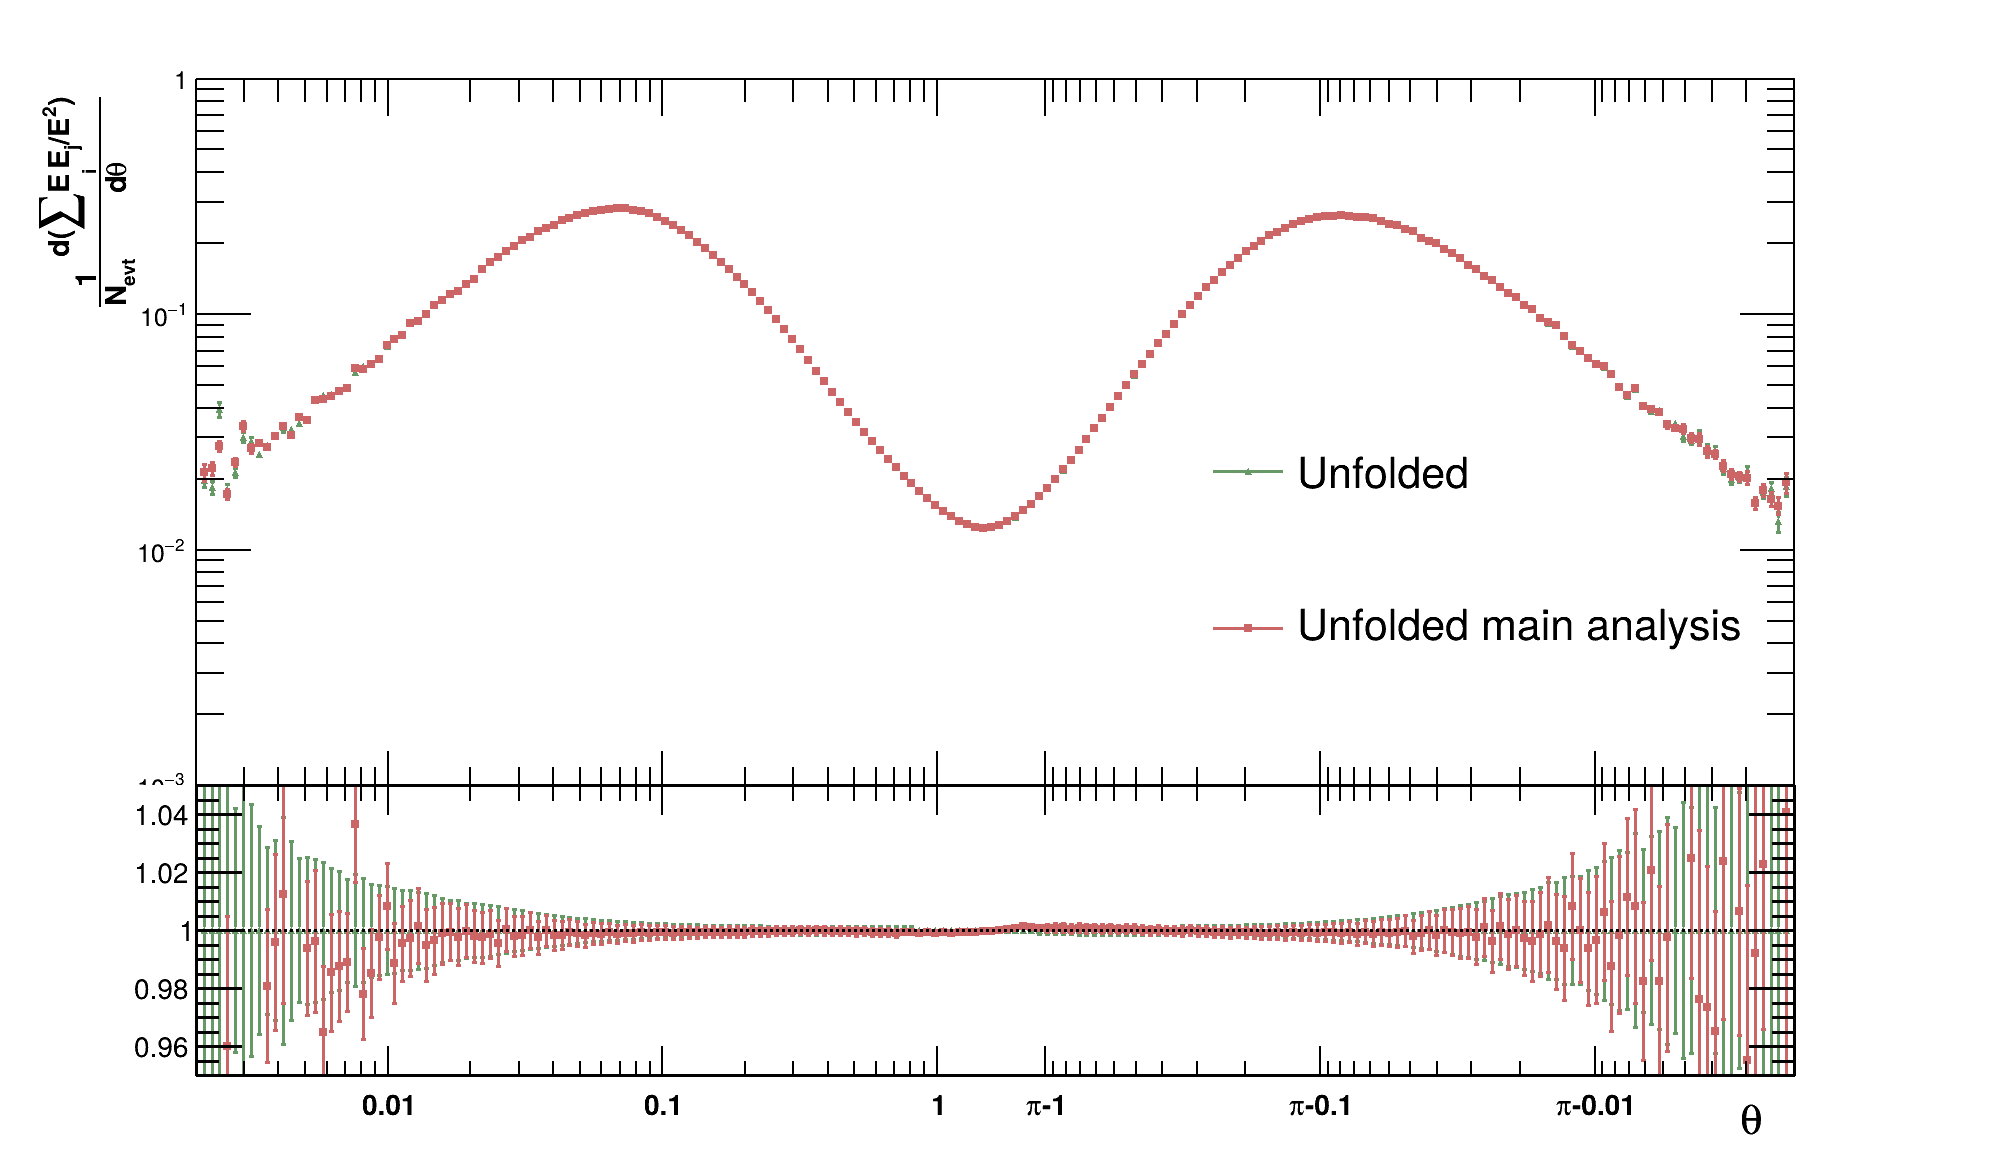

Info in <TCanvas::Print>: png file EEC_unfold_data_theta_comp.png has been created


In [41]:
eijbins2 = [0.0, 0.0001, 0.0002, 0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002, 0.00225, 0.0025, 0.00275, 0.003, 0.0035, 0.004, 0.005, 0.007, 0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.10, 0.15, 0.20, 0.3, 1]
unfoldfname1 = 'unfolded_data_v14_bin2.root'
unfoldfname2 = 'unfolded_data_v11_bin2.root'

infile1 = ROOT.TFile(unfoldfname1)
infile2 = ROOT.TFile(unfoldfname2)
responsefname = 'response_LEP1MC1994_v14.root'
responsefile = ROOT.TFile(responsefname)
normalization1 = responsefile.Get('counter').GetBinContent(2)
responsefile2 = ROOT.TFile('response_LEP1MC1994_v11.root')
normalization2 = responsefile2.Get('counter').GetBinContent(1)

hdata1 = infile1.Get('UNFOLD_Eij_Bin0')
hdata1.Scale(0.)
hdata1.SetDirectory(0)
unfold1 = []
for i in range(len(eijbins2)-1):
    unfold1d = infile1.Get(f'UNFOLD_Eij_Bin{i}')
    unfold1d.SetDirectory(0)
    unfold1+=[unfold1d]
    unfold1d.Scale((eijbins2[i]+eijbins2[i+1])/2.)
    hdata1.Add(unfold1d)
hdata1=devideBinWidth(hdata1)
hdata1.Scale(1./normalization1)

hdata2 = infile2.Get('UNFOLD_Eij_Bin0')
hdata2.Scale(0.)
hdata2.SetDirectory(0)
unfold2 = []
for i in range(len(eijbins2)-1):
    unfold1d = infile2.Get(f'UNFOLD_Eij_Bin{i}')
    unfold1d.SetDirectory(0)
    unfold2+=[unfold1d]
    unfold1d.Scale((eijbins2[i]+eijbins2[i+1])/2.)
    hdata2.Add(unfold1d)
hdata2=devideBinWidth(hdata2)
hdata2.Scale(1./normalization2)

data1_eec = ROOT.TGraphErrors()
data2_eec = ROOT.TGraphErrors()
#mc_eec = ROOT.TGraphErrors()
ratio1 = ROOT.TGraphErrors()
ratio2 = ROOT.TGraphErrors()

bins = []
eecs = []
errs = []
for b in range(hdata1.GetNbinsX()):
    data1_eec.SetPoint(b, b+0.5, hdata1.GetBinContent(b+1))
    data1_eec.SetPointError(b, 0, hdata1.GetBinError(b+1))
    data2_eec.SetPoint(b, b+0.5, hdata2.GetBinContent(b+1))
    data2_eec.SetPointError(b, 0, hdata2.GetBinError(b+1))
    #mc_eec.SetPoint(b, b+0.5, hmc.GetBinContent(b+1))
    #mc_eec.SetPointError(b, 0, hmc.GetBinError(b+1))
    #den = hmc.GetBinContent(b+1) 
    den = hdata1.GetBinContent(b+1)
    bins+=[hdata1.GetBinCenter(b+1)]
    eecs+=[hdata2.GetBinContent(b+1)]
    errs+=[hdata2.GetBinError(b+1)]
    ratio1.SetPoint(b, b+0.5, hdata1.GetBinContent(b+1)/den)
    ratio1.SetPointError(b, 0, hdata1.GetBinError(b+1)/den)
    ratio2.SetPoint(b, b+0.5, hdata2.GetBinContent(b+1)/den)
    ratio2.SetPointError(b, 0, hdata2.GetBinError(b+1)/den)

labels=np.array([0.01, 0.1, 1, np.pi-1, np.pi-0.1, np.pi-0.01])
t_labels=['0.01', '0.1', '1', '#pi-1', '#pi-0.1', '#pi-0.01']

lower_indices = np.searchsorted(bins, labels, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

bins = np.array(bins)

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (labels - x0) / (x1 - x0)
indices = lower_indices + fractional_part  # Final fractional indices

increments = [0.001, 0.01, 0.1]
points_to_extrapolate = [
    increment + increment * i
    for increment in increments
    for i in range(10)
]

points_to_extrapolate=[]
for i in range(9):
    points_to_extrapolate+=[0.002+0.001*i]
for i in range(10):
    points_to_extrapolate+=[0.01+0.01*i]
for i in range(10):
    points_to_extrapolate+=[0.1+0.1*i]

lower_indices = np.searchsorted(bins, points_to_extrapolate, side='right') - 1
lower_indices = np.clip(lower_indices, 0, len(bins) - 2)  # Ensure we don't go out of bounds

# Compute fractional indices
x0 = bins[lower_indices]
x1 = bins[lower_indices + 1]
fractional_part = (points_to_extrapolate - x0) / (x1 - x0)
p_indices = lower_indices + fractional_part  # Final fractional indices

#hdata2.Scale(423832+437325+472380/normalization)

#hmc = responsefile.Get('gen1d_eec')

ROOT.gStyle.SetLineWidth(0)

xmin = 0.
xmax = 200.

ymin = 0.001
ymax = 1

rymin = 0.95
rymax = 1.05
rylen = rymax-rymin

ticks = []

ROOT.gStyle.SetOptStat(0)
c4 = ROOT.TCanvas("tmp", "", 0, 0, 2000, 1200)

c4.Divide(1, 2)
pad1 = ROOT.TPad("", "", 0, 0.33, 1, 1)
pad2 = ROOT.TPad("", "", 0, 0, 1, 0.33)
pad1.SetFrameLineWidth(0)
pad2.SetFrameLineWidth(0)

pad1.SetBottomMargin(0.0)
pad2.SetTopMargin(0.0)
pad2.SetBottomMargin(0.25) 

pad1.Draw()
pad2.Draw()

pad1.cd()
pad1.SetLogy()
data1_eec.Draw('ap')
data1_eec.SetMarkerSize(1)
data1_eec.SetMarkerStyle(22)
data1_eec.SetMarkerColor(ROOT.kGreen-5)
data1_eec.SetLineColor(ROOT.kGreen-5)
data1_eec.SetLineWidth(3)
data1_eec.GetXaxis().SetTickLength(0)
data1_eec.GetXaxis().SetLabelSize(0)
data1_eec.GetXaxis().SetRangeUser(xmin, xmax)
data1_eec.GetYaxis().SetRangeUser(ymin, ymax)

data2_eec.Draw('samep')
data2_eec.SetMarkerSize(1)
data2_eec.SetMarkerStyle(21)
data2_eec.SetMarkerColor(ROOT.kRed-6)
data2_eec.SetLineColor(ROOT.kRed-6)
data2_eec.SetLineWidth(3)

#mc_eec.Draw('samep')
#c_eec.SetMarkerSize(2)
#mc_eec.SetMarkerStyle(20)
#mc_eec.SetMarkerColor(ROOT.kGray+2)
#mc_eec.SetLineColor(ROOT.kGray+2)
#mc_eec.SetLineWidth(3)

data1_eec.Draw('samep')
data2_eec.Draw('samep')

f = ROOT.TF1("f", "log10(x)", ymin, ymax)
newaxis0 = ROOT.TGaxis(p_indices[0],ymin,p_indices[0],ymax,'f',505,"-G")
newaxis0.SetLabelSize(0)
newaxis0.SetLineWidth(2)
newaxis0.Draw()

newaxis1 = ROOT.TGaxis(xmax-p_indices[0],ymin,xmax-p_indices[0],ymax,'f',505,"+G")
newaxis1.SetLabelSize(0)
newaxis1.SetLineWidth(2)
newaxis1.Draw()

l0 = ROOT.TLine(xmin,ymax,xmax,ymax)
l0.SetLineWidth(2)
l0.Draw()

l1 = ROOT.TLine(xmin,ymin,xmax,ymin)
l1.SetLineWidth(2)
l1.Draw()

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], 0.7*ymax, indices[i], ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], ymin, indices[i], ymin+ymin*0.4)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, 0.8*ymax, xmin+point, ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, 0.8*ymax, xmax-point, ymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, ymin, xmin+point, ymin+ymin*0.2)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, ymin, xmax-point, ymin+ymin*0.2)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

txt1 = ROOT.TLatex()
txt1.SetTextSize(0.04) 
txt1.SetTextAlign(22) 
txt1.SetTextAngle(90)
txt1.DrawLatex(-14, 0.3*ymax, "#frac{1}{N_{evt}}#frac{d(#sumE_{i}E_{j}/E^{2})}{d#theta}")

legend = ROOT.TLegend(0.6, 0.1, 0.8, 0.5)
legend.AddEntry(data1_eec, "Unfolded", 'alp')
legend.AddEntry(data2_eec, "Unfolded main analysis", 'alp')
#legend.AddEntry(mc_eec, "GEN 1d", 'alp')
legend.SetTextSize(0.06)
legend.SetFillStyle(0)
legend.Draw("same")

pad2.cd()
ratio1.Draw('ap')
ratio1.SetLineWidth(2)
ratio1.GetXaxis().SetTickLength(0)
ratio1.GetXaxis().SetLabelSize(0)
ratio1.GetXaxis().SetRangeUser(xmin, xmax)
ratio1.SetMarkerSize(1)
ratio1.SetMarkerStyle(22)
ratio1.SetMarkerColor(ROOT.kGreen-5)
ratio1.SetLineColor(ROOT.kGreen-5)
ratio1.SetLineWidth(3)

ratio1.GetYaxis().SetRangeUser(rymin, rymax)
ratio1.GetYaxis().SetNdivisions(505)
ratio1.GetYaxis().SetLabelSize(0.08)

ratio2.Draw('samep')
ratio2.SetMarkerSize(1)
ratio2.SetMarkerStyle(21)
ratio2.SetMarkerColor(ROOT.kRed-6)
ratio2.SetLineColor(ROOT.kRed-6)
ratio2.SetLineWidth(3)

for i,l in enumerate(t_labels):
    latex = ROOT.TLatex()
    latex.SetTextSize(0.08) 
    latex.SetTextAlign(22) 
    latex.DrawLatex(indices[i], rymin-0.1*rylen, l)
    tick = ROOT.TLine(indices[i], rymin, indices[i], rymin+rylen*0.1)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for i,l in enumerate(t_labels):
    tick = ROOT.TLine(indices[i], rymax-rylen*0.1, indices[i], rymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, rymin, xmin+point, rymin+rylen*0.05)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]
  
for point in p_indices:
    tick = ROOT.TLine(xmax-point, rymin, xmax-point, rymin+rylen*0.05)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmin+point, rymax-rylen*0.05, xmin+point, rymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

for point in p_indices:
    tick = ROOT.TLine(xmax-point, rymax-rylen*0.05, xmax-point, rymax)
    tick.SetLineWidth(2)
    tick.Draw()
    ticks+=[tick]

newaxis2 = ROOT.TGaxis(p_indices[0], rymin, p_indices[0], rymax, rymin, rymax, 505, '-L')
newaxis2.SetLabelSize(0)
newaxis2.SetLineWidth(3)
newaxis2.Draw()

newaxis3 = ROOT.TGaxis(xmax-p_indices[0], rymin, xmax-p_indices[0], rymax, rymin, rymax, 505, '+L')
newaxis3.SetLabelSize(0)
newaxis3.SetLineWidth(3)
newaxis3.Draw()

l2 = ROOT.TLine(0, rymax, 200, rymax)
l2.SetLineWidth(3)
l2.Draw()

l3 = ROOT.TLine(0, rymin, 200, rymin)
l3.SetLineWidth(3)
l3.Draw()

l4 = ROOT.TLine(0,1,200,1)
l4.SetLineWidth(3)
l4.SetLineStyle(2)
l4.Draw()

txt2 = ROOT.TLatex()
txt2.SetTextSize(0.12) 
txt2.SetTextAlign(22) 
txt2.DrawLatex(195, rymin-0.15*rylen, "#theta")


c4.SaveAs('EEC_unfold_data_theta_comp.png')
c4.Close()
#clear_output(wait=True)
display(Image("EEC_unfold_data_theta_comp.png"))

In [33]:
import matplotlib.pyplot as plt

unfoldfname = 'unfolded_data_v14_bin2.root'
infile = ROOT.TFile(unfoldfname, 'r')
matrix=infile.Get("TMatrixT<double>;1")

nb=matrix.GetNrows()

cov = np.zeros((28, 28) + (200, 200))

n_theta = 200
n_eec = 28

for i in range(n_eec):
    for j in range(n_eec):
        for k in range(n_theta):
            for l in range(n_theta):
                cov[i, j, k, l] = matrix(i * n_theta + k, j * n_theta + l)

#fig, axes = plt.subplots(n_eec, n_eec, figsize=(11, 10), 
#                         gridspec_kw={'wspace': 0, 'hspace': 0})

#for i in range(n_eec):
#    for j in range(n_eec):
#        ax = axes[i, j]
#        ax.imshow(cov[i, j], cmap='Pastel1_r', aspect='auto')
#       ax.axis('off') 

#plt.show()

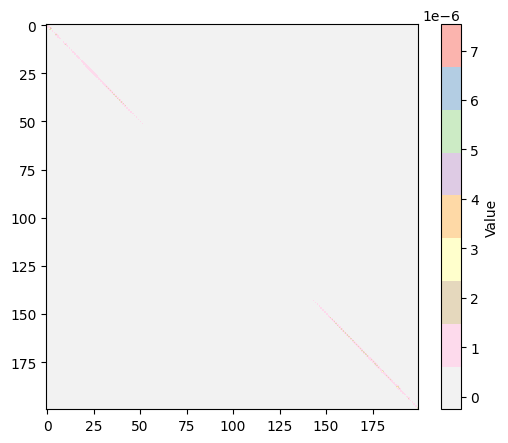

In [34]:
def covariance_to_correlation(cov_matrix):
    std_dev = np.sqrt(np.diag(cov_matrix))  # Standard deviations
    outer_product = np.outer(std_dev, std_dev)  # Denominator
    correlation_matrix = cov_matrix / outer_product  # Element-wise division
    np.fill_diagonal(correlation_matrix, 1)  # Ensure diagonal is exactly 1
    return correlation_matrix


bincenters = [(eijbins2[i]+eijbins2[i+1]) * 0.5 for i in range(len(eijbins2)-1)]

weights = np.outer(bincenters, bincenters)

weights_expanded = weights[:, :, np.newaxis, np.newaxis] 

cov_proj = np.sum(cov * weights_expanded, axis=(0, 1))

binWidth = np.diff(bin_edge)

binWidth_2d = np.outer(binWidth, binWidth)

cov_proj = cov_proj/binWidth_2d

cov_proj = cov_proj/(normalization**2)

corr = covariance_to_correlation(cov_proj)

plt.figure(figsize=(6, 5))
plt.imshow(cov_proj, cmap='Pastel1_r', aspect='auto')
plt.colorbar(label="Value")
plt.savefig("covariance.png")
plt.show()

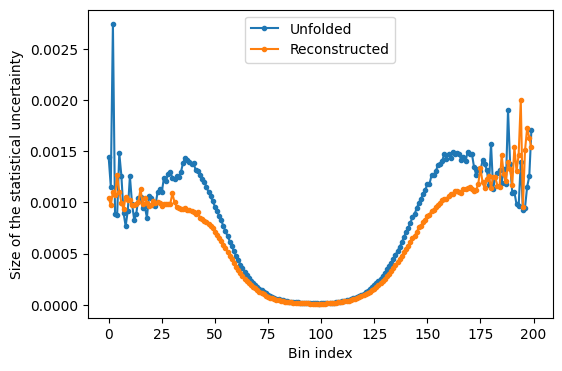

In [35]:
err = np.sqrt(np.diag(cov_proj))

infile1 = ROOT.TFile(unfoldfname1)

whichH = 'RECO'
hdata1 = infile1.Get(f'{whichH}_Eij_Bin0')
hdata1.Scale(0.)
hdata1.SetDirectory(0)
unfold1 = []
for i in range(len(eijbins2)-1):
    unfold1d = infile1.Get(f'{whichH}_Eij_Bin{i}')
    unfold1d.SetDirectory(0)
    unfold1+=[unfold1d]
    unfold1d.Scale((eijbins2[i]+eijbins2[i+1])/2.)
    hdata1.Add(unfold1d)
hdata1=devideBinWidth(hdata1)
hdata1.Scale(1./normalization)

err_orig = []
for b in range(hdata1.GetNbinsX()):
    err_orig+=[hdata1.GetBinError(b+1)]

plt.figure(figsize=(6, 4))
plt.plot(err, marker='o', linestyle='-', markersize=3, label='Unfolded')
plt.plot(err_orig, marker='o', linestyle='-', markersize=3, label='Reconstructed')
plt.xlabel("Bin index")
plt.ylabel("Size of the statistical uncertainty")
plt.legend(loc='upper center')
plt.savefig("stats_error.png")
plt.show()